In [1]:
import json
import os

with open("temp_output/bad_val_batch.json") as f:
    bad_val = json.load(f)


In [2]:
print(bad_val.keys())

dict_keys(['inputs', 'labels', 'batch_size', 'loss', 'epoch'])


In [3]:
import numpy as np
import torch
inputs_val = torch.tensor(np.array(bad_val["inputs"]))

In [4]:
from luxonis_train.utils.visualization import *
img = unnormalize(inputs_val[0], to_uint8=True)

In [5]:
from luxonis_train.utils.boxutils import xywh2xyxy_coco

data = torch.tensor(np.array(bad_val["labels"]["bbox"]))
bboxs = xywh2xyxy_coco(data[:, 2:])
bboxs[:, 0::2] *= 512
bboxs[:, 1::2] *= 512
labels = data[:,1].int()
img_labels = draw_bounding_boxes(img, bboxs, labels=None)

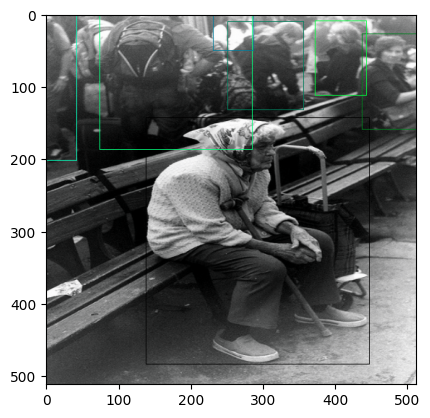

In [6]:
import matplotlib.pyplot as plt
img_outputs = torch_to_cv2(img_labels, to_rgb=False)
plt.imshow(img_outputs)
plt.show()

In [7]:
with open("temp_output/bad_train_batch_0.json") as f:
    bad_train = json.load(f)

In [8]:
inputs_train = torch.tensor(np.array(bad_train["inputs"]))
inputs_train.shape

torch.Size([1, 3, 512, 512])

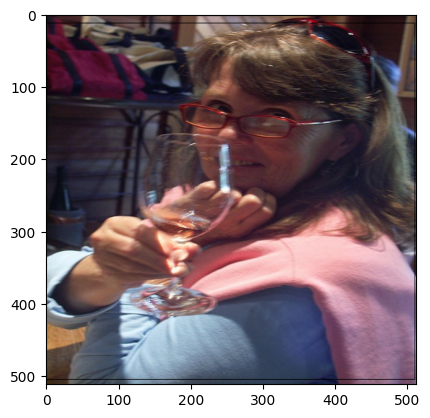

In [12]:
img = unnormalize(inputs_train[0], to_uint8=True)
data = torch.tensor(np.array(bad_train["labels"]["bbox"]))
bboxs = xywh2xyxy_coco(data[:, 2:])
bboxs[:, 0::2] *= 512
bboxs[:, 1::2] *= 512
labels = data[:,1].int()
img_labels = draw_bounding_boxes(img, bboxs, labels=None)
img_outputs = torch_to_cv2(img_labels, to_rgb=False)
plt.imshow(img_outputs)
plt.show()